# Guía 5: Modelo de Ising

Generar configuraciones del equilibrio para un sistema monodimensional de $N$ espines interactuantes dispuestos regularmente y descriptos por el siguiente Hamiltoniano: $$\mathcal{H} = - B \mu \sum_{i=1}^N \sigma_i - J \sum_{\langle i, j \rangle} \sigma_i \sigma_j,$$ donde $\sigma_i$ es la dirección del espín del sitio $i$ y puede tomar los valores $\pm 1$, $\mu$ es su momento magnético, $B$ el campo magnético externo y $J$ la constante de acoplamiento espín-espín. El símbolo $\langle i, j \rangle$ indica que la suma se realiza sobre pares de espines ubicados en sitios de primeros vecinos.

## Ayuda

Considerese $B=\mu=J=1$. Seguramente va a ser necesario usar `NumPy` y `matplotlib`:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Escribir una función que inicialice los $N$ espines en alguna configuración deseada

In [2]:
def init(n, ordered=True):
    return np.ones(n) if ordered else np.random.choice([1, -1], size=n)

Escribir una función que para una configuración calcule la magnetización $M = \frac{\mu}{N} \sum_{i=1}^N \sigma_i$.

In [3]:
def magnetizacion(espines):
    return np.abs(np.mean(espines))

Escribir una función que calcule el hamiltoniano del sistema para una dada configuración de espínes monodimiensional.

In [4]:
def hamiltoniano(n, espines):
    H = 0
    for i in range(n):
        H -= espines[i] * (espines[(i - 1) % n] + espines[(i + 1) % n])
        
    return (H / (2 * n)) - magnetizacion(espines)

Escribir una función que recorra la grilla y haga los pasos de Metropolis a una dada temperatura (_Ayuda: notar que el cambio de energía que provocaría un cambio en el signo del espín del sitio $i$ puede calcularse sólo con sus primeros vecinos_)

In [5]:
def metropolis(n, espines, temperatura):
    for _ in range(n):
        i = np.random.randint(0, high=n)
        delta = 2 * espines[i] * (espines[(i - 1) % n] + espines[(i + 1) % n])
        if delta <= 0 or np.random.rand() <= np.exp(-delta / temperatura):
            espines[i] = - espines[i]
    
    return espines

Ahora ya se tiene todo lo necesario para escribir un algoritmo que realice $M$ pasos de Monte Carlo con el modelo de Ising, calcular la energía y la magnetización en función de los pasos para distintas temperaturas, dar los valores medios, visualizar los espines, etc...

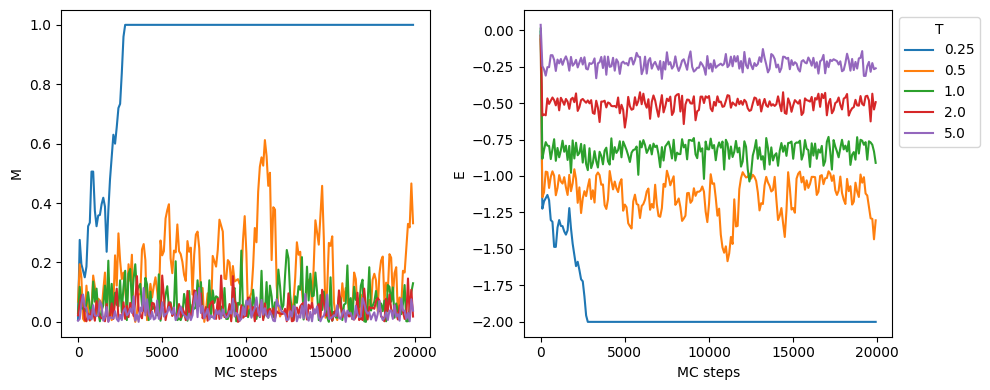

In [6]:
n = 1000
mc_steps = 20_000
each = 100
x = range(0, mc_steps, each)
temperaturas = [0.25, 0.5, 1.0, 2.0, 5.0]

fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
for temp in temperaturas:
    espines = init(n, ordered=False)

    eng, mag = [], []
    for i in range(mc_steps):
        if i % each == 0:
            eng.append(hamiltoniano(n, espines))
            mag.append(magnetizacion(espines))
        espines = metropolis(n, espines, temp)
    
    ax[0].plot(x, mag, label=temp)
    ax[1].plot(x, eng, label=temp)

ax[0].set_ylabel("M")
ax[0].set_xlabel("MC steps")
ax[1].set_ylabel("E")
ax[1].set_xlabel("MC steps")

ax[1].legend(title="T", bbox_to_anchor=(1, 1))
fig.tight_layout()

plt.show()